## This is HNA or Hybrid SFLA-CSO Network Aligner program, and implemented by Elham Mahdipour that is Ph.D. Candidate of Artificial Intelligence at Yazd University, Yazd, Iran. 
### All copyright reserved by the author.

You can run the program from first to end and see all the results, but since the population generation process can take a time depended on the node numbers of networks, you can use the populations stored in each program. We saved the populations as the pair of related species that you can see in the input folder and load them on program, such as "ce-sc-pop.pickle". Therefore, you must run follow steps: 1) Run all cells in "Load Graphs", "Swap Graphs", "Define Target Graph",and "Compute Score for create similarity matrix" sections. 2) If you will use saved population, please upload related pickle on root of jupyter notebook, then go "load population" cell and run them; else, please run "multi tasking for initial population", "multi processing for speed up", and "Initialization such as MeAlign" cells. 3) Run all remains cells to create results.

# Load Graphs 

In [1]:
import pickle
with open('mm-mm-weighted.pickle', 'rb') as f:
    mmlist = pickle.load(f)

In [2]:
with open('ce-ce-weighted.pickle', 'rb') as f:
    celist = pickle.load(f)

In [3]:
import networkx as nx
G1=nx.Graph()
for i in range(len(mmlist)):
    if G1.has_node(mmlist[i][0])==False:
        G1.add_node(mmlist[i][0])
    if G1.has_node(mmlist[i][1])==False:
        G1.add_node(mmlist[i][1])
    G1.add_edge(mmlist[i][0],mmlist[i][1],weight=mmlist[i][2])
G1

In [4]:
G1.number_of_nodes()

623

In [5]:
G1.number_of_edges()

1760

In [6]:
len(G1)

623

In [7]:
G2=nx.Graph()
for i in range(len(celist)):
    if G2.has_node(celist[i][0])==False:
        G2.add_node(celist[i][0])
    if G2.has_node(celist[i][1])==False:
        G2.add_node(celist[i][1])
    G2.add_edge(celist[i][0],celist[i][1],weight=celist[i][2])
G2

In [8]:
print('len G1:', len(G1))

print('len G2:',len(G2))

len G1: 623
len G2: 2990


# Swap graphs if len G1 > len G2

In [9]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

623
2990


In [10]:
ed1=G1.edges()

In [11]:
nd1=G1.nodes()

In [12]:
ed2=G2.edges()

In [13]:
len(ed2)

10078

In [14]:
nd2=G2.nodes()

In [15]:
len(ed1)

1760

In [16]:
len(nd1)

623

In [17]:
el1=list(ed1)
el2=list(ed2)

In [18]:
nd1=list(nd1)
nd2=list(nd2)

In [19]:
degG1 = [val for (node, val) in G1.degree()]


In [20]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [21]:
G_target_na=nx.read_weighted_edgelist('ce-mm.evals')
G_target_na  

In [22]:
gtnode=list(G_target_na.nodes())
print(len(gtnode))
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

#print(gtnode)
print(len(g_t_node))

25628
2791


In [23]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())
            #b=list(a[0][0].values())
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=a[0])
G_target

In [24]:
len(G_target)

1171

In [25]:
G_target_na=G_target

In [26]:
G_target_na.edges()

EdgeView([('mm8699', 'ce9424'), ('mm8699', 'ce7922'), ('mm8699', 'ce2061'), ('mm8699', 'ce10707'), ('mm8699', 'ce3894'), ('mm8699', 'ce2747'), ('mm8699', 'ce5405'), ('mm8699', 'ce4233'), ('mm8699', 'ce10321'), ('mm8699', 'ce8997'), ('mm8699', 'ce1429'), ('mm8699', 'ce11741'), ('mm8699', 'ce7815'), ('mm8699', 'ce8246'), ('mm8699', 'ce2414'), ('mm8699', 'ce1519'), ('mm8699', 'ce3969'), ('mm8699', 'ce4083'), ('mm8699', 'ce3187'), ('mm8699', 'ce3367'), ('mm8699', 'ce9381'), ('mm8699', 'ce6376'), ('mm8699', 'ce4424'), ('mm8699', 'ce7873'), ('mm8699', 'ce4710'), ('mm8699', 'ce878'), ('mm8699', 'ce1309'), ('mm8699', 'ce3917'), ('mm8699', 'ce6546'), ('mm8699', 'ce6958'), ('mm8699', 'ce4590'), ('mm8699', 'ce303'), ('mm8699', 'ce1617'), ('mm8699', 'ce3016'), ('mm8699', 'ce3256'), ('mm8699', 'ce2528'), ('mm8699', 'ce3569'), ('mm8699', 'ce1979'), ('mm8699', 'ce1883'), ('mm8699', 'ce684'), ('mm8699', 'ce4264'), ('mm8699', 'ce6411'), ('mm8699', 'ce1227'), ('mm8699', 'ce1208'), ('mm8699', 'ce8883'), 

# Compute Score for create similarity matrix

In [27]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [28]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [29]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [30]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [31]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [32]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [33]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [34]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [35]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [36]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [37]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [38]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

# multi processing for speed up

In [39]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initialization such as MeAlign

In [40]:
#%%prun
import random
import threading

len_pop=300 
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)#[item for item in base_permute if item not in index_score]
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
     
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
    
    """for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1) """               
    print('in for loop')
    """for z1 in range(len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])"""
     
    
      
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2task3

Done!, i= 0
wait
in for loop
task1task2

task3
Done!, i= 1
wait
in for loop
task1
task2
task3
Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2
task3
Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2task3

Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3
Done!, i= 13
wait
in for loop
task1
task2
task3
Done!, i= 14
wait
in for loop
task1
task2
task3
Done!, i= 15
wait
in for loop
task1
task2
task3
Done!, i= 16
wait
in for loop
task1
task2
task3
Done!, i= 17
wait
in for loop
task1
task2
task3
Done!, i= 18
wait
in for loop
task1
task2
task3
Done!, i= 19
wait
in for loop
task1
task2
task3
Done!, i= 20
wa

Done!, i= 169
wait
in for loop
task1
task2
task3
Done!, i= 170
wait
in for loop
task1
task2
task3
Done!, i= 171
wait
in for loop
task1
task2
task3
Done!, i= 172
wait
in for loop
task1
task2
task3
Done!, i= 173
wait
in for loop
task1
task2
task3
Done!, i= 174
wait
in for loop
task1
task2
task3
Done!, i= 175
wait
in for loop
task1
task2
task3
Done!, i= 176
wait
in for loop
task1
task2
task3
Done!, i= 177
wait
in for loop
task1
task2
task3
Done!, i= 178
wait
in for loop
task1
task2
task3
Done!, i= 179
wait
in for loop
task1
task2
task3
Done!, i= 180
wait
in for loop
task1
task2
task3
Done!, i= 181
wait
in for loop
task1
task2
task3
Done!, i= 182
wait
in for loop
task1
task2
task3
Done!, i= 183
wait
in for loop
task1
task2
task3
Done!, i= 184
wait
in for loop
task1
task2
task3
Done!, i= 185
wait
in for loop
task1
task2
task3
Done!, i= 186
wait
in for loop
task1
task2
task3
Done!, i= 187
wait
in for loop
task1
task2
task3
Done!, i= 188
wait
in for loop
task1
task2
task3
Done!, i= 189
wait
i

array([[[0.000e+00, 1.523e+03],
        [1.000e+00, 8.930e+02],
        [2.000e+00, 1.665e+03],
        ...,
        [6.200e+02, 1.452e+03],
        [6.210e+02, 2.772e+03],
        [6.220e+02, 1.103e+03]],

       [[0.000e+00, 1.690e+03],
        [1.000e+00, 9.280e+02],
        [2.000e+00, 1.583e+03],
        ...,
        [6.200e+02, 2.650e+03],
        [6.210e+02, 2.367e+03],
        [6.220e+02, 1.600e+02]],

       [[0.000e+00, 2.095e+03],
        [1.000e+00, 1.623e+03],
        [2.000e+00, 2.457e+03],
        ...,
        [6.200e+02, 2.142e+03],
        [6.210e+02, 7.960e+02],
        [6.220e+02, 1.570e+02]],

       ...,

       [[0.000e+00, 2.964e+03],
        [1.000e+00, 1.430e+03],
        [2.000e+00, 1.956e+03],
        ...,
        [6.200e+02, 9.680e+02],
        [6.210e+02, 2.241e+03],
        [6.220e+02, 2.390e+03]],

       [[0.000e+00, 1.239e+03],
        [1.000e+00, 7.050e+02],
        [2.000e+00, 7.050e+02],
        ...,
        [6.200e+02, 1.665e+03],
        [6.210e+02

# Save population

In [33]:
import pickle
with open('mm-ce-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [34]:
import pickle
with open('mm-ce-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

## You can load population if there is save population such as 'mm-ce-pop.pickle'

# Load population

In [ ]:
with open('mm-ce-base_permute', 'rb') as f:
    base_permute = pickle.load(f)

In [ ]:
with open('mm-ce-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [41]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [42]:
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
num_seq=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))

for i in range(len(p)):
    ec=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                           
         if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):
            num_seq[i]+=1  # create sequence matrix 
            map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
            ec=ec+1            
            nc=nc+2
                 
    score_ec[i]=ec/G1.number_of_edges()*100
    score_ics[i]=ec/num_induced*100
    score_s3[i]=ec/(G1.number_of_edges()+num_induced-ec)*100
    score_nc[i]=nc/G1.number_of_nodes()*100 
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100
    """if (score_nc[i] > 100):
        score_nc[i]=100
    if (score_ec[i] > 100):
        score_ec[i]=100
    if (score_ics[i] > 100):
        score_ics[i]=100
    if (score_s3[i] > 100):
        score_s3[i]=100
    if ( score_ncorectness[i]>100):
         score_ncorectness[i]=100"""

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('nc',score_nc)
print('node correctness: ',  score_ncorectness)

ec
[14.31818182 13.57954545 13.35227273 14.09090909 13.92045455 13.75
 13.06818182 12.84090909 13.18181818 13.75       13.57954545 13.46590909
 14.20454545 13.69318182 13.69318182 13.86363636 13.63636364 14.54545455
 13.69318182 13.86363636 13.23863636 13.69318182 13.29545455 13.35227273
 12.61363636 13.46590909 13.46590909 13.57954545 13.40909091 13.40909091
 12.32954545 13.57954545 13.23863636 13.69318182 12.72727273 13.06818182
 13.57954545 13.97727273 13.80681818 13.57954545 12.67045455 13.06818182
 12.61363636 13.52272727 13.35227273 13.80681818 13.97727273 13.125
 13.63636364 13.125      13.40909091 14.03409091 13.69318182 13.18181818
 13.35227273 13.52272727 13.46590909 13.29545455 13.52272727 12.67045455
 14.26136364 13.01136364 12.72727273 13.97727273 13.23863636 13.75
 13.92045455 13.63636364 13.52272727 12.84090909 13.125      12.95454545
 13.29545455 13.18181818 13.06818182 13.97727273 13.92045455 13.52272727
 13.63636364 13.18181818 13.23863636 13.80681818 13.23863636 13.9

## number of matched sequences 

In [43]:
num_seq

array([252., 239., 235., 248., 245., 242., 230., 226., 232., 242., 239.,
       237., 250., 241., 241., 244., 240., 256., 241., 244., 233., 241.,
       234., 235., 222., 237., 237., 239., 236., 236., 217., 239., 233.,
       241., 224., 230., 239., 246., 243., 239., 223., 230., 222., 238.,
       235., 243., 246., 231., 240., 231., 236., 247., 241., 232., 235.,
       238., 237., 234., 238., 223., 251., 229., 224., 246., 233., 242.,
       245., 240., 238., 226., 231., 228., 234., 232., 230., 246., 245.,
       238., 240., 232., 233., 243., 233., 245., 241., 247., 244., 235.,
       240., 244., 241., 245., 237., 241., 237., 254., 234., 234., 231.,
       242., 245., 237., 233., 245., 236., 213., 246., 240., 230., 228.,
       233., 239., 243., 237., 223., 232., 234., 233., 224., 237., 244.,
       234., 239., 238., 236., 231., 243., 237., 236., 230., 257., 238.,
       224., 222., 236., 225., 240., 235., 238., 228., 232., 236., 236.,
       241., 227., 249., 239., 243., 237., 226., 24

## compute topology score

In [44]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[5935.76925826 5564.0297695  5577.1389975  5885.66158741 5505.62678378
 6063.79007345 5470.27855753 5089.05622169 5458.83188453 5799.57299999
 6064.59919044 5825.70688339 5765.2081639  5891.11981431 5557.66066531
 5466.40388021 5505.7437753  6216.34479077 5713.37075672 5416.75952023
 5626.79215839 5443.54049058 5137.73294473 5901.8349805  5556.32201162
 6413.29273857 6126.91810211 5822.82147432 4776.45736697 5547.01704769
 5583.63357858 5398.36587969 5651.60708336 5604.65984079 5730.24065978
 5666.3016971  5797.14203289 5444.67684273 5711.54721806 5684.33294056
 5208.07596375 5382.98700293 5146.4779517  5517.3952897  5908.57992561
 5868.28538945 5528.09873036 5412.14889161 6020.5331948  5377.78609123
 5287.17751949 5642.79185778 6644.1190379  5702.8016723  5436.39121129
 5558.39498244 5558.64393061 6150.5461159  5766.52841268 5619.71023458
 6183.65968995 5135.58416534 4793.78233731 5869.85703024 5505.91601993
 5604.21923868 5591.29512139 6175.44728841 5798.45820403 5500.00815192
 5476.

# Compute Topology and Sequence score

In [45]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([3093.88462913, 2901.51488475, 2906.06949875, 3066.8307937 ,
       2875.31339189, 3152.89503673, 2850.13927876, 2657.52811085,
       2845.41594226, 3020.7865    , 3151.79959522, 3031.3534417 ,
       3007.60408195, 3066.05990715, 2899.33033266, 2855.2019401 ,
       2872.87188765, 3236.17239539, 2977.18537836, 2830.37976011,
       2929.8960792 , 2842.27024529, 2685.86647236, 3068.41749025,
       2889.16100581, 3325.14636929, 3181.95905106, 3030.91073716,
       2506.22868348, 2891.50852385, 2900.31678929, 2818.68293984,
       2942.30354168, 2922.82992039, 2977.12032989, 2948.15084855,
       3018.07101644, 2845.33842137, 2977.27360903, 2961.66647028,
       2715.53798187, 2806.49350146, 2684.23897585, 2877.69764485,
       3071.7899628 , 3055.64269472, 2887.04936518, 2821.57444581,
       3130.2665974 , 2804.39304561, 2761.58875975, 2944.89592889,
       3442.55951895, 2967.40083615, 2835.69560564, 2898.19749122,
       2897.82196531, 3192.27305795, 3002.26420634, 2921.35511

## Define function for fitness and compute final score

In [46]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [47]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        if G_target_na.has_edge(nd1[x1],nd2[x2]):
            num_seq_temp+=1              
            ec_temp=ec_temp+1            
            nc_temp=nc_temp+2
                 
    score_ec_temp=ec_temp/G1.number_of_edges()*100
    score_ics_temp=ec_temp/counter_induced*100
    score_s3_temp=ec_temp/(G1.number_of_edges()+counter_induced-ec_temp)*100
    score_nc_temp=nc_temp/G1.number_of_nodes()*100
    score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100
    """if (score_nc_temp > 100):
        score_nc_temp=100
    if (score_ec_temp > 100):
        score_ec_temp=100
    if (score_ics_temp > 100):
        score_ics_temp=100
    if (score_s3_temp > 100):
        score_s3_temp=100
    if ( score_ncorectness>100):
         score_ncorectness=100"""
    # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('nc',score_nc_temp)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    
    return score_temp,pre,rec,fsc


# HNA: Hybrid SFLA-CSO proposed method

In [48]:
# Implementation of Hybrid SFLA-CSO Algorithm
import random
from operator import itemgetter
from random import shuffle
import concurrent.futures

precision=np.zeros(len_pop)
recall=np.zeros(len_pop)
fscore=np.zeros(len_pop)

dim=len_G1
new_pop=p.tolist()
[new_pop[i].append(score[i]) for i in range(len_pop)]
#[print(new_pop[i][dim]) for i in range(len_pop)]

new_pop=sorted(new_pop, key=itemgetter(dim),reverse=True)
counter_induced=num_induced #0

GBestFrog=new_pop[0]
#print("GBest: ",GBestFrog)

index=0
iteration=2
epoch=0
memeplex=100

group=int(len_pop/memeplex)
len_G1=len(G1)
dim=len_G1
GbestFlag=False
max_score=max(score)
while (epoch<5):
    k=u=0
    #==== Set memeplexes =====
    memp=[]
    memp.append([new_pop[0],new_pop[memeplex],new_pop[2*memeplex]])#,new_pop[3*memeplex],new_pop[4*memeplex]])
    for i in range(1,memeplex):    
        memp.append([new_pop[i],new_pop[i+memeplex],new_pop[i+2*memeplex]])#,new_pop[i+3*memeplex],new_pop[i+4*memeplex]])
    #print('Check memeplex')
    #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
    #=== Local Search =====   
    while(k<memeplex):
        u=0
        print("k ",k)
        print("epoch ",epoch)
        while(u<iteration):
            print("u ",u)
            memp[k]=sorted(memp[k], key=itemgetter(dim),reverse=True)
            #print('Check sort memeplex')
            #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
            #=== set best frog and worst frog 
            bestFrog=memp[k][0]
            worstFrog=memp[k][group-1]            
            #print("BestFrog",bestFrog[dim])
            #print("WorstFrog",worstFrog[dim])
            r1=random.random()
            c1=2
            TeV=(worstFrog[dim]+r1*c1*(bestFrog[dim]-worstFrog[dim]))/100             #number of permutation
           # print(TeV)
                       
            # move 1
            temp_worst=worstFrog    #temp_worst is TeX
            Flag_move1=False
            # counter induced for ics compute            
            """with concurrent.futures.ThreadPoolExecutor() as executor:
                future = executor.submit(induced_function_for_pop, temp_worst)
                counter_induced = future.result()
                #print("counter induced: ",counter_induced)"""
            
            for i in range(int(TeV)):
                #Flag_move1=False
                rand_index1=random.randint(0,dim-1)
                rand_permute=random.sample(base_permute,len_G1)                
                #print('rand1',rand_index1)                                
                if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                                                 
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])                        
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if(G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move1=True
                                    print('move1 ', TeV)                                                                 
            #======== move 2 =======
            Flag_move2=False
            
            if(Flag_move1==False):
                    TeV=(worstFrog[dim]+r1*c1*(GBestFrog[dim]-worstFrog[dim]))/100   #number of random permutation                
                            #print(TeV)                
           
                    temp_worst=worstFrog    #temp_worst is TeX               
                
                    for i in range(int(TeV)):
                        #Flag_move2=False
                        rand_permute=random.sample(base_permute,len_G1)
                        rand_index1=random.randint(0,dim-1)
                        if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                            
                            temp_score=np.argmax(m[rand_index1])
                            #print(nd2[temp_score])
                            #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                            if(G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score                                                                   
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move2=True
                                    print('move2 ', TeV)                                                                      
                    #===== move 3 =====
            
            if(Flag_move1==False and Flag_move2==False):
                TeV=(worstFrog[dim]*random.random()*2)/100             #number of permutation
                                            # print(TeV)
                              
                temp_worst=worstFrog   #temp_worst is TeX                    
                for i in range(int(TeV)):
                    rand_permute=random.sample(base_permute,len_G1)
                    rand_index1=random.randint(0,dim-1) 
                    if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                        
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if (G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                                    
                            temp_worst[rand_index1][1]=temp_score                            
                            Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                            if(Fit_New>worstFrog[dim]):
                                print('w',worstFrog[dim])
                                print('new',Fit_New)
                                temp_worst[dim]=Fit_New
                                memp[k][group-1]=temp_worst  
                                print('move3 ',TeV)
                
            u=u+1
        k=k+1    
    epoch+=1
    #==== combine memeplexes and create new pop ====
    print('*********** fitness **************')    
    new_pop=[]
    for i in range(memeplex):
        for j in range(group):        
            del memp[i][j][dim]
       
    [[new_pop.append(memp[i][j]) for j in range(group)] for i in range(memeplex)]         
    
    for i in range(len_pop):
        Fit,pre,rec,fsc=Fitness(new_pop[i],counter_induced)
        print('Fit pop',Fit)
        new_pop[i].append(Fit)
        score[i]=Fit
        precision[i]=pre
        recall[i]=rec
        fscore[i]=fsc
    
    new_pop=sorted(new_pop, key=itemgetter(dim), reverse=True)
    print('********** new population ************')
    [print('Fitness: ',new_pop[i][dim]) for i in range(len_pop)]
    
    GBestFrog=new_pop[0]
    
#print("GBest: ",GBestFrog)    
print("epoch: ",epoch)
print("score:", score)
#********** print Local Measures *********
print("Precision: ",precision)
print("Recall: ", recall)
print("F-measure: ",fscore)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]):
            map_items.append([nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])])) 

print("end")

k  0
epoch  0
u  0
score: 2857.988074474202
w 2830.379760113991
new 2857.988074474202
move1  37.486656611948554
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  37.486656611948554
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  37.486656611948554
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  37.486656611948554
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  37.486656611948554
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  37.486656611948554
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  37.486656611948554
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  37.4866566119

score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  28.46362116138052
score: 2857.988074474202
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  28.46362116138052
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  28.46362116138052
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  28.46362116138052
score: 2893.127272897591
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  28.46362116138052
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  28.46362116138052
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  28.46362116138052
k  7
epoch  0
u  0
score: 2647.152884371238
score: 2658.865950468557
score: 2658.865950468557
score: 2670.5790165

new 2857.988074474202
move1  35.54795974010649
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  35.54795974010649
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  35.54795974010649
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  35.54795974010649
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  35.54795974010649
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  35.54795974010649
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  35.54795974010649
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  35.54795974010649
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move

score: 2752.570479329449
score: 2752.570479329449
score: 2764.283545447395
score: 2764.283545447395
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
score: 2787.7096776902067
u  1
score: 2799.4227438150783
score: 2811.1358099422637
w 2805.1506439055015
new 2811.1358099422637
move1  28.420307817662103
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  28.420307817662103
score: 2822.848876071766
score: 2822.848876071766
score: 2822.848876071766
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  28.420307817662103
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  28.420307817662103
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  28.420307817662103
score: 2869.701140613
w 2857.988074474202


score: 2752.570479329449
score: 2764.283545447395
score: 2764.283545447395
score: 2775.996611567646
score: 2775.996611567646
score: 2787.7096776902067
score: 2787.7096776902067
score: 2799.4227438150783
w 2799.0394944822083
new 2799.4227438150783
move1  31.150558988308248
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  31.150558988308248
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  31.150558988308248
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  31.150558988308248
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  31.150558988308248
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  31.150558988308248
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  31.150558988308248
score: 2869.701140613
u  1
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  33.422908393932545
score: 2893.12727289759

score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  30.71853074173644
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  30.71853074173644
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.71853074173644
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.71853074173644
score: 2846.2750083377327
u  1
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  31.249172023353886
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  31.249172023353886
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  31.249172023353886
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  31.249172023353886
score: 2893.127272897591
score: 2893.127272897591
s

score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  32.969646428764875
k  36
epoch  0
u  0
score: 2822.848876071766
w 2783.9800909060887
new 2822.848876071766
move1  29.666106686301593
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  29.666106686301593
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  29.666106686301593
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.666106686301593
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  29.666106686301593
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.666106686301593
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.666106686301593
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2904.84

score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.000369023295075
score: 2916.5534051915283
score: 2916.5534051915283
u  1
score: 2787.7096776902067
score: 2799.4227438150783
score: 2799.4227438150783
score: 2799.4227438150783
score: 2799.4227438150783
score: 2799.4227438150783
score: 2799.4227438150783
score: 2799.4227438150783
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
score: 2822.848876071766
score: 2822.848876071766
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
k  41
epoch  0
u  0
score: 2647.152884371238
score: 2647.152884371238
score: 2647.152884371238
score: 2647.152884371238
score: 2647.152884371238
score: 2658.865950468557
score: 2658.865950468557
score: 2658.865950468557
score: 2670.5790165681565
score: 2670.5790165681565
score: 2670.5790165681565
score: 2670.

score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  32.723170465585305
score: 2822.848876071766
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  32.723170465585305
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  32.723170465585305
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  32.723170465585305
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  32.723170465585305
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  32.723170465585305
u  1
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  32.14936062886961
score: 2893.12727289

score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  28.548591091078855
score: 2904.84033904339
u  1
score: 2752.570479329449
score: 2752.570479329449
score: 2764.283545447395
score: 2775.996611567646
score: 2775.996611567646
score: 2787.7096776902067
score: 2787.7096776902067
score: 2799.4227438150783
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
score: 2822.848876071766
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
k  53
epoch  0
u  0
score: 2729.144347100463
score: 2729.144347100463
score: 2740.8574132138065
score: 2752.570479329449
w 2750.625460436949
new 2752.570479329449
move1  31.749134158223
score: 2752.570479329449
score: 2752.570479329449
score: 2752.570479329449
score: 2752.570479329449
score: 2752.570479329449
score: 2752.570479329449
score: 2752.570479329449
score: 2764.2

score: 2717.4312809894186
score: 2717.4312809894186
score: 2717.4312809894186
score: 2729.144347100463
score: 2740.8574132138065
score: 2752.570479329449
w 2742.934917348075
new 2752.570479329449
move1  28.008148253590278
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  28.008148253590278
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  28.008148253590278
score: 2775.996611567646
score: 2775.996611567646
u  1
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  30.151270750069457
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  30.151270750069457
score: 2799.4227438150783
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  30.151270750069457
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.8488

score: 2799.4227438150783
w 2718.805658642314
new 2799.4227438150783
move1  29.56302391884611
score: 2799.4227438150783
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  29.56302391884611
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  29.56302391884611
score: 2822.848876071766
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  29.56302391884611
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  29.56302391884611
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.56302391884611
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
u  1
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 

score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  28.650621863710377
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  28.650621863710377
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  28.650621863710377
k  69
epoch  0
u  0
score: 2705.718214880668
score: 2705.718214880668
score: 2705.718214880668
score: 2717.4312809894186
w 2712.5400654440386
new 2717.4312809894186
move1  32.37900883382335
score: 2717.4312809894186
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  32.37900883382335
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  32.37900883382335
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
move1  32.37900883382335
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  32.37900883382335
score:

k  75
epoch  0
u  0
score: 2682.2920826700392
score: 2682.2920826700392
score: 2682.2920826700392
score: 2694.005148774209
score: 2705.718214880668
w 2696.9083179443414
new 2705.718214880668
move1  28.387151193406865
score: 2705.718214880668
score: 2705.718214880668
score: 2717.4312809894186
w 2705.718214880668
new 2717.4312809894186
move1  28.387151193406865
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  28.387151193406865
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  28.387151193406865
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
move1  28.387151193406865
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  28.387151193406865
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  28.387151193406865
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
u  1
score: 2787.7096776902067
w 2775.996611

u  1
score: 2658.865950468557
score: 2670.5790165681565
w 2668.14349083795
new 2670.5790165681565
move1  27.823291512349087
score: 2682.2920826700392
w 2670.5790165681565
new 2682.2920826700392
move1  27.823291512349087
score: 2694.005148774209
w 2682.2920826700392
new 2694.005148774209
move1  27.823291512349087
score: 2705.718214880668
w 2694.005148774209
new 2705.718214880668
move1  27.823291512349087
score: 2717.4312809894186
w 2705.718214880668
new 2717.4312809894186
move1  27.823291512349087
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  27.823291512349087
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  27.823291512349087
score: 2740.8574132138065
score: 2740.8574132138065
score: 2740.8574132138065
score: 2740.8574132138065
score: 2740.8574132138065
score: 2740.8574132138065
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
move1  27.823291512349087
score: 2752.570479329449
score: 2752.570479329449
score: 27

score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.291354354641438
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.291354354641438
score: 2857.988074474202
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  30.291354354641438
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  30.291354354641438
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  30.291354354641438
score: 2893.127272897591
score: 2893.127272897591
k  85
epoch  0
u  0
score: 2658.865950468557
w 2657.5281108455392
new 2658.865950468557
move1  30.04920560042995
score: 2670.5790165681565
w 2658.865950468557
new 2670.5790165681565
move1  30.04920560042995
score: 2670.5790165681565
score: 2670.5790165681565
score: 2682.2920826700392
w 2670.5790165681565
new 2682.2

score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  30.61773854262893
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  30.61773854262893
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  30.61773854262893
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.61773854262893
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  30.61773854262893
k  89
epoch  0
u  0
score: 2553.4483556744804
score: 2553.4483556744804
score: 2553.4483556744804
score: 2565.161421753649
score: 2565.161421753649
score: 2565.161421753649
score: 2576.8744878350767
score: 2576.8744878350767
score: 2576.8744878350767
score: 2576.8744878350767
score: 2588.5875539187664
score: 2588.5875539187664
score: 2600.3006200047203
score: 2612.013686092942
score: 2623.7267521834337
score: 2623.7267521834337
score: 2623.7267521834337
score: 2635.4398182761984
score: 2647.152884371238
w 264

score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  31.603697604834107
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  31.603697604834107
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  31.603697604834107
score: 2799.4227438150783
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  31.603697604834107
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  31.603697604834107
u  1
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  28.300170517308008
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  28.300170517308008
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  28.300170517308008
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
m

score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  28.790581810101568
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  28.790581810101568
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  28.790581810101568
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  28.790581810101568
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  28.790581810101568
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  28.790581810101568
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  28.790581810101568
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  28.790581810101568
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  28.790581810101568
score: 3010.257934461190

score: 2904.84033904339
Fit pop 2904.84033904339
score: 2740.8574132138065
Fit pop 2740.8574132138065
score: 2846.2750083377327
Fit pop 2846.2750083377327
score: 2775.996611567646
Fit pop 2775.996611567646
score: 2881.4142067541284
Fit pop 2881.4142067541284
score: 2811.1358099422637
Fit pop 2811.1358099422637
score: 2799.4227438150783
Fit pop 2799.4227438150783
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2846.2750083377327
Fit pop 2846.2750083377327
score: 2822.848876071766
Fit pop 2822.848876071766
score: 2881.4142067541284
Fit pop 2881.4142067541284
score: 2881.4142067541284
Fit pop 2881.4142067541284
score: 2834.561942203588
Fit pop 2834.561942203588
score: 2916.5534051915283
Fit pop 2916.5534051915283
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2834.561942203588
Fit pop 2834.561942203588
score: 2705.718214880668
Fit pop 2705.718214880668
score: 2857.988074474202
Fit pop 2857.988074474202
score: 2916.5534051915283
Fit pop 2916.5534051915283
score: 2822.8

score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  28.030524570687238
score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  28.030524570687238
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  28.030524570687238
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  28.030524570687238
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  28.030524570687238
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  28.030524570687238
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  28.030524570687238
score: 2916.5534051915283
score: 2916.5534051915283
u  1
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.245911621997124
score: 2893.127272897

score: 2916.5534051915283
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  31.145157203612285
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  31.145157203612285
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  31.145157203612285
score: 2951.692603650008
k  6
epoch  1
u  0
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  28.245598745094604
score: 2799.4227438150783
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  28.245598745094604
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  28.245598745094604
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  28.245598745094604
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  28.245598745094604
score: 2857.988074474202
w 2846.2750083377327
ne

score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  29.822908843341505
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  29.822908843341505
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.822908843341505
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  29.822908843341505
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.822908843341505
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.822908843341505
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  29.822908843341505
score: 2904.84033904339
score: 2904.84033904339
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.822908843341505
score: 2916.5534051915283
u  1
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272

score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.49297750470477
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.49297750470477
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.49297750470477
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  30.49297750470477
score: 2869.701140613
u  1
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.33890434053843
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.33890434053843
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  29.33890434053843
score: 2904.84033904339
score: 2904.84033904339
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.33890434053843
score: 2916.5534051915283
score: 2916.5534051915283


score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.059218755173923
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.059218755173923
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.059218755173923
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
k  20
epoch  1
u  0
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  28.870702391036208
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  28.870702391036208
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  28.870702391036208
score: 2822.848876071766
w

score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  30.021248242822466
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.021248242822466
k  26
epoch  1
u  0
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  30.527350297008795
score: 2787.7096776902067
score: 2787.7096776902067
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  30.527350297008795
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  30.527350297008795
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  30.527350297008795
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.527350297008795
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.27500

score: 2916.5534051915283
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.091815988163493
k  30
epoch  1
u  0
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  30.679648564117688
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  30.679648564117688
score: 2787.7096776902067
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  30.679648564117688
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  30.679648564117688
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  30.679648564117688
score: 2822.848876071766
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.679648564117688
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.679648564117688
score: 2846.2750083

score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.12136802578222
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.12136802578222
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  30.12136802578222
u  1
score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  28.751399077303123
score: 2857.988074474202
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  28.751399077303123
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  28.751399077303123
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  28.751399077303123
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904

score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  28.49953963738324
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  28.49953963738324
score: 2916.5534051915283
score: 2916.5534051915283
k  39
epoch  1
u  0
score: 2764.283545447395
score: 2764.283545447395
score: 2764.283545447395
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  30.424144410207564
score: 2775.996611567646
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  30.424144410207564
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  30.424144410207564
score: 2799.4227438150783
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  30.424144410207564
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  30.42414

score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  30.415829479793473
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.415829479793473
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.415829479793473
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.415829479793473
u  1
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.853851117564254
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  29.853851117564254
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.853851117564254
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.853851117564254
score: 2893.127272897591
score: 28

score: 2764.283545447395
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  30.489458517493162
score: 2775.996611567646
score: 2775.996611567646
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  30.489458517493162
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  30.489458517493162
score: 2799.4227438150783
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  30.489458517493162
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  30.489458517493162
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.489458517493162
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.489458517493162
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.489458517493162
score: 2857.988074474202
score: 2857.988074474202
score: 2869.7011

score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  30.33135268052059
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.33135268052059
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.33135268052059
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.33135268052059
u  1
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  29.962061785167766
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.962061785167766
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  29.962061785167766
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.962061785167766
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.962061785167766
score: 2904.8403390

score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  27.59560848743841
score: 2799.4227438150783
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  27.59560848743841
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  27.59560848743841
u  1
score: 2822.848876071766
score: 2822.848876071766
score: 2822.848876071766
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  29.617896356342968
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  29.617896356342968
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.617896356342968
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  29.6178

score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.021250709198256
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.021250709198256
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.021250709198256
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
k  63
epoch  1
u  0
score: 2729.144347100463
score: 2729.144347100463
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  27.765231450497836
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
move1  27.765231450497836
score: 2752.570479329449
score: 2752.570479329449
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  27.765231450497836
score: 2764.283545447395
score: 2764.283545447395
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
m

score: 2893.127272897591
k  68
epoch  1
u  0
score: 2717.4312809894186
score: 2717.4312809894186
score: 2717.4312809894186
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  29.15104020325197
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  29.15104020325197
score: 2740.8574132138065
score: 2740.8574132138065
score: 2740.8574132138065
score: 2740.8574132138065
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
move1  29.15104020325197
score: 2752.570479329449
score: 2752.570479329449
u  1
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  29.477717476462775
score: 2764.283545447395
score: 2764.283545447395
score: 2764.283545447395
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  29.477717476462775
score: 2787.7096776902067
w 2775.996611567646
new 27

score: 2717.4312809894186
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  28.594617728286806
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2729.144347100463
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  28.594617728286806
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
move1  28.594617728286806
score: 2752.570479329449
u  1
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  30.14483713425443
score: 2764.283545447395
score: 2764.283545447395
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  30.14483713425443
score: 2775.996611567646
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  30.14483713425443
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
score: 2787.7096776902067
sco

score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.725508205572787
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.725508205572787
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
k  78
epoch  1
u  0
score: 2705.718214880668
w 2694.005148774209
new 2705.718214880668
move1  27.200002129642815
score: 2705.718214880668
score: 2705.718214880668
score: 2717.4312809894186
w 2705.718214880668
new 2717.4312809894186
move1  27.200002129642815
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  27.200002129642815
score: 2729.144347100463
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  27.200002129642815
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
mov

score: 2752.570479329449
score: 2752.570479329449
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  29.908082888597463
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  29.908082888597463
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
u  1
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  28.284980130248414
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  28.284980130248414
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  28.284980130248414
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  28.284980130248414
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  28.284980130248414
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  28.284980130248414
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.27500

score: 2717.4312809894186
score: 2717.4312809894186
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  27.303979157776016
score: 2729.144347100463
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  27.303979157776016
score: 2740.8574132138065
u  1
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
move1  30.10211917532198
score: 2752.570479329449
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  30.10211917532198
score: 2764.283545447395
score: 2764.283545447395
score: 2764.283545447395
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  30.10211917532198
score: 2775.996611567646
score: 2775.996611567646
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  30.10211917532198
score: 2787.7096776902067
score: 2787.7096776902067
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  30.10211917532198
score: 2799.4227438150783
score: 27

score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
score: 2775.996611567646
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  28.810400134267592
score: 2787.7096776902067
score: 2799.4227438150783
w 2787.7096776902067
new 2799.4227438150783
move1  28.810400134267592
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  28.810400134267592
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  28.810400134267592
score: 2822.848876071766
k  93
epoch  1
u  0
score: 2658.865950468557
w 2647.152884371238
new 2658.865950468557
move1  29.47052354698654
score: 2658.865950468557
score: 2658.865950468557
score: 2658.865950468557
score: 2658.865950468557
score: 2658.865950468557
score: 2658.865950468557
score: 2658.865950468557
score: 2658.865950468557
score: 2658.865950468557
score: 2670.5790165681565
w 2658.865950468557
new 2670.5790165681565
move1  29.47052354698654
score: 2682

score: 2647.152884371238
w 2635.4398182761984
new 2647.152884371238
move1  28.49270574119372
score: 2658.865950468557
w 2647.152884371238
new 2658.865950468557
move1  28.49270574119372
score: 2670.5790165681565
w 2658.865950468557
new 2670.5790165681565
move1  28.49270574119372
score: 2670.5790165681565
score: 2670.5790165681565
score: 2670.5790165681565
score: 2682.2920826700392
w 2670.5790165681565
new 2682.2920826700392
move1  28.49270574119372
score: 2682.2920826700392
score: 2682.2920826700392
score: 2682.2920826700392
score: 2682.2920826700392
u  1
score: 2682.2920826700392
score: 2694.005148774209
w 2682.2920826700392
new 2694.005148774209
move1  27.35765915252403
score: 2705.718214880668
w 2694.005148774209
new 2705.718214880668
move1  27.35765915252403
score: 2717.4312809894186
w 2705.718214880668
new 2717.4312809894186
move1  27.35765915252403
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  27.35765915252403
score: 2729.144347100463
score: 2729.1443

Fit pop 2939.979537494835
score: 2857.988074474202
Fit pop 2857.988074474202
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2846.2750083377327
Fit pop 2846.2750083377327
score: 2904.84033904339
Fit pop 2904.84033904339
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2846.2750083377327
Fit pop 2846.2750083377327
score: 2963.4056698075315
Fit pop 2963.4056698075315
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2846.2750083377327
Fit pop 2846.2750083377327
score: 2975.1187359674086
Fit pop 2975.1187359674086
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2857.988074474202
Fit pop 2857.988074474202
score: 2916.5534051915283
Fit pop 2916.5534051915283
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2846.2750083377327
Fit pop 2846.2750083377327
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2846.2750083377327
Fit pop 2846.275

Fitness:  2834.561942203588
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2822.848876071766
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:  2811.1358099422637
Fitness:

score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  30.19101063846253
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.19101063846253
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  30.19101063846253
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  30.19101063846253
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  30.19101063846253
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.19101063846253
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.19101063846253
u  1
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.4769495370639
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.4769495370639
score: 29

score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.7927688471323
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  30.7927688471323
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  30.7927688471323
score: 2951.692603650008
u  1
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.474511077340086
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.474511077340086
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.474511077340086
score: 2963

score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  28.707104687221648
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  28.707104687221648
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  28.707104687221648
score: 2904.84033904339
score: 2904.84033904339
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  28.707104687221648
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  28.707104687221648
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  28.707104687221648
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  28.707104687221648
score: 2951.692603650008
score: 2951.692603650008
score: 2963.4056698075

score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.704924340705617
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.704924340705617
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.704924340705617
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.704924340705617
score: 2986.8318021296423
score: 2986.8318021296423
score: 2986.8318021296423
k  20
epoch  2
u  0
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  30.465406640514516
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  30.46540664

score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  30.810067184758704
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.810067184758704
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  30.810067184758704
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  30.810067184758704
score: 2951.692603650008
u  1
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.961602464308463
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.961602464308463
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.961602464308463
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.961602464308463
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.118735967408

w 2869.701140613
new 2881.4142067541284
move1  29.121164802265852
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.121164802265852
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  29.121164802265852
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.121164802265852
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.121164802265852
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.121164802265852
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.121164802265852
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.121164802265852
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.121164802265852
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.1211

move1  29.535445118626658
score: 2975.1187359674086
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.535445118626658
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.535445118626658
k  37
epoch  2
u  0
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  28.752549839615185
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  28.752549839615185
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  28.752549839615185
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  28.752549839615185
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  28.752549839615185
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915283
score: 2916.5534051915

score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.630182612772057
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.630182612772057
score: 2951.692603650008
k  41
epoch  2
u  0
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.01555564987122
score: 2857.988074474202
score: 2857.988074474202
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  29.01555564987122
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.01555564987122
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.01555564987122
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  29.01555564987122
score: 2904.8403

score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.937607053268476
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.937607053268476
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.937607053268476
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.937607053268476
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.937607053268476
k  46
epoch  2
u  0
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  29.367377691731996
score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.367377691731996
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  29.367377691731996
score: 2869.701140613
s

score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  28.48419965864581
score: 2963.4056698075315
score: 2963.4056698075315
u  1
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.307846550693466
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.307846550693466
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.307846550693466
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.307846550693466
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.307846550693466
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.307846550693466
score: 2975.1187359674086
score: 29

score: 2951.692603650008
score: 2951.692603650008
score: 2951.692603650008
k  55
epoch  2
u  0
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.51219925826429
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.51219925826429
score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.51219925826429
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  30.51219925826429
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  30.51219925826429
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  30.51219925826429
score: 2893.127272897591
score: 2893.127272897591
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  30.51219925826429
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033

score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.981820890783233
k  59
epoch  2
u  0
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.115535274410313
score: 2834.561942203588
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.115535274410313
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.115535274410313
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  30.115535274410313
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2869.701140613
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  30.115535274410313
score: 2881.4142067541284
score: 2881.4142067541284
u  1
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  28.

score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  28.9183350019408
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  28.9183350019408
k  65
epoch  2
u  0
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  30.495105377177875
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  30.495105377177875
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  30.495105377177875
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  30.495105377177875
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  30.495105377177875
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  30.495105377177875
score: 2893.127272897591
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
mo

score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  29.45118084115588
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  29.45118084115588
score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.45118084115588
score: 2881.4142067541284
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.45118084115588
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  29.45118084115588
u  1
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  29.818722443463717
score: 2904.84033904339
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.818722443463717
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.

score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.27789961144674
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  29.27789961144674
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.27789961144674
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.27789961144674
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.27789961144674
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.27789961144674
k  74
epoch  2
u  0
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  29.15398510515112
score: 2834.561942203588
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  29.15398510515112
score: 2846.2750083377327
score: 2846.27

score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.954631926374585
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.954631926374585
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.954631926374585
score: 2975.1187359674086
score: 2975.1187359674086
k  79
epoch  2
u  0
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  28.347229884721163
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  28.347229884721163
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  28.347229884721163
score: 2857.988074474202
w 2846.2750083377327
new 2857.988074474202
move1  28.347229884721163
score: 2857.988074474202
score: 2869.701140613
w 2857.988074474202
new 2869.701140613
move1  28.347229884721163
s

score: 2916.5534051915283
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.533657944456376
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.533657944456376
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.533657944456376
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.533657944456376
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
k  85
epoch  2
u  0
score: 2811.1358099422637
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  29.985696578638112
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  29.985696578638112
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.275008

score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  28.922094511003994
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  28.922094511003994
score: 2951.692603650008
score: 2951.692603650008
score: 2951.692603650008
k  90
epoch  2
u  0
score: 2799.4227438150783
score: 2799.4227438150783
score: 2799.4227438150783
score: 2811.1358099422637
w 2799.4227438150783
new 2811.1358099422637
move1  28.849101037167433
score: 2822.848876071766
w 2811.1358099422637
new 2822.848876071766
move1  28.849101037167433
score: 2822.848876071766
score: 2834.561942203588
w 2822.848876071766
new 2834.561942203588
move1  28.849101037167433
score: 2834.561942203588
score: 2846.2750083377327
w 2834.561942203588
new 2846.2750083377327
move1  28.849101037167433
score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
score: 2846.2750083377327
score: 28

move1  30.07731993477033
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  30.07731993477033
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  30.07731993477033
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.07731993477033
score: 2928.266471342009
u  1
score: 2881.4142067541284
score: 2881.4142067541284
score: 2881.4142067541284
score: 2893.127272897591
w 2881.4142067541284
new 2893.127272897591
move1  29.204563637505117
score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  29.204563637505117
score: 2904.84033904339
score: 2904.84033904339
score: 2904.84033904339
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.204563637505117
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.204563637505117
score: 2939.979537494835
w 2928.266471342009
ne

score: 2881.4142067541284
w 2869.701140613
new 2881.4142067541284
move1  29.42497346373551
score: 2881.4142067541284
score: 2881.4142067541284
k  99
epoch  2
u  0
score: 2705.718214880668
w 2694.005148774209
new 2705.718214880668
move1  28.041654932465903
score: 2717.4312809894186
w 2705.718214880668
new 2717.4312809894186
move1  28.041654932465903
score: 2717.4312809894186
score: 2729.144347100463
w 2717.4312809894186
new 2729.144347100463
move1  28.041654932465903
score: 2740.8574132138065
w 2729.144347100463
new 2740.8574132138065
move1  28.041654932465903
score: 2752.570479329449
w 2740.8574132138065
new 2752.570479329449
move1  28.041654932465903
score: 2764.283545447395
w 2752.570479329449
new 2764.283545447395
move1  28.041654932465903
score: 2775.996611567646
w 2764.283545447395
new 2775.996611567646
move1  28.041654932465903
score: 2787.7096776902067
w 2775.996611567646
new 2787.7096776902067
move1  28.041654932465903
score: 2799.4227438150783
w 2787.7096776902067
new 2799.422

score: 2951.692603650008
Fit pop 2951.692603650008
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2893.127272897591
Fit pop 2893.127272897591
score: 2963.4056698075315
Fit pop 2963.4056698075315
score: 2963.4056698075315
Fit pop 2963.4056698075315
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2998.5448682942356
Fit pop 2998.5448682942356
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2904.84033904339
Fit pop 2904.84033904339
score: 2975.1187359674086
Fit pop 2975.1187359674086
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2893.127272897591
Fit pop 2893.127272897591
score: 2951.692603650008
Fit pop 2951.692603650008
score: 2951.692603650008
Fit pop 2951.692603650008
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2986.8318021296423
Fit pop 2986.8318021296423
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2939.979537494835
Fit pop 2939.979537494835
score: 2975.1187359674086
Fit pop 2975.1187359674086
score: 2939.979537494

score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  31.86269166086141
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  31.86269166086141
score: 3057.1101991526893
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  31.86269166086141
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  31.86269166086141
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  31.86269166086141
u  1
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.68917213313492
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.68917213313492
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.68917213313492
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.68917213313492
score: 3033.6840668021982

score: 2951.692603650008
score: 2951.692603650008
score: 2951.692603650008
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.781740700653145
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
u  1
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.304163427601015
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.304163427601015
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.304163427601015
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.304163427601015
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.304163427601015
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.304163427601015
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.3971329762

score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.273379097090967
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.273379097090967
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.273379097090967
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.273379097090967
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.273379097090967
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.273379097090967
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.273379097090967
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.273379097090967
score: 3068

new 2963.4056698075315
move1  30.66793470514407
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.66793470514407
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.66793470514407
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.66793470514407
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.66793470514407
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.66793470514407
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.66793470514407
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.66793470514407
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.66793470514407
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
mov

score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  31.635737431255407
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  31.635737431255407
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  31.635737431255407
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  31.635737431255407
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  31.635737431255407
score: 3045.397132976257
k  20
epoch  3
u  0
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  30.115283539378716
score: 2951.692603650008
score: 2951.692603650008
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  30.115283539378716
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.115283539378716
score: 2975.1187359674086
score: 2975.11873596

score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.98942227307472
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.98942227307472
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  29.98942227307472
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  29.98942227307472
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  29.98942227307472
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  29.98942227307472
score: 3045.397132976257
k  25
epoch  3
u  0
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.711169845832615
score: 2951.692603650

score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  29.432533134455152
score: 3033.6840668021982
u  1
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.0210494649118
score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.0210494649118
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.0210494649118
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.0210494649118
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.0210494649118
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.0210494649118
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.0210494649118
score: 3045.3971329

score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.36930176244437
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.36930176244437
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.36930176244437
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.36930176244437
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.36930176244437
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.36930176244437
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.36930176244437
score: 3057.1101991526893
k  35
epoch  3
u  0
score: 2928.266471342009
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  30.669823844371425
score

score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  29.691021076304747
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  29.691021076304747
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  29.691021076304747
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  29.691021076304747
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  29.691021076304747
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  29.691021076304747
score: 3092.249397696255
score: 3092.249397696255
k  39
epoch  3
u  0
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  30.24244979615258
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  30.24244979615258
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  30.2424

score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.62280740612231
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.62280740612231
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.62280740612231
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  29.62280740612231
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
k  44
epoch  3
u  0
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.314295299303623
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.314295299303623
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.314295299303623
score: 2

score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.341334614299605
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.341334614299605
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
k  48
epoch  3
u  0
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.440216631280265
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.440216631280265
score: 2951.692603650008
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.440216631280265
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.440216631280265
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.44021

score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  30.193494759005507
score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.193494759005507
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.193494759005507
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.193494759005507
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.193494759005507
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.193494759005507
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.193494759005507
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.193494759005507
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.193494

score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.662091006722452
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.662091006722452
u  1
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.701572067825758
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.701572067825758
score: 2975.1187359674086
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.701572067825758
score: 2986.8318021296423
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.701572067825758
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  29.701572067825758
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  29.701572067825758
score: 3021.97100063051
s

score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  29.67589403635264
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
k  62
epoch  3
u  0
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  30.664963479149097
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.664963479149097
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  30.664963479149097
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  30.664963479149097
score: 2951.692603650008
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  30.664963479149097
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.664963479149097
score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new

score: 3033.6840668021982
u  1
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.621698284451938
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.621698284451938
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.621698284451938
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.621698284451938
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  29.621698284451938
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  29.621698284451938
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  29.621698284451938
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  29.621698284451938
score: 3057.1101991526893
w 

score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.531484100523652
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.531484100523652
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  29.531484100523652
k  71
epoch  3
u  0
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.77224640899297
score: 2916.5534051915283
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.77224640899297
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.77224640899297
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.77224640899297
score: 2951.6

score: 3021.97100063051
u  1
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  30.374516508535297
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.374516508535297
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.374516508535297
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.374516508535297
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.374516508535297
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.374516508535297
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.374516508535297
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045

score: 2986.8318021296423
score: 2986.8318021296423
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.93762943109378
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  29.93762943109378
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  29.93762943109378
score: 3021.97100063051
k  80
epoch  3
u  0
score: 2904.84033904339
score: 2904.84033904339
score: 2904.84033904339
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  29.40927413274975
score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  29.40927413274975
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.40927413274975
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.97953749

score: 2916.5534051915283
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.5617333525712
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
score: 2928.266471342009
u  1
score: 2928.266471342009
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  29.283854226051133
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.283854226051133
score: 2951.692603650008
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.283854226051133
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.283854226051133
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
mo

score: 2951.692603650008
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.23221942375269
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.23221942375269
score: 2975.1187359674086
u  1
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  30.08566341372302
score: 2951.692603650008
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  30.08566341372302
score: 2963.4056698075315
score: 2963.4056698075315
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  30.08566341372302
score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.831802

score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.380762755019386
score: 2951.692603650008
u  1
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  29.893503840971462
score: 2951.692603650008
score: 2963.4056698075315
w 2951.692603650008
new 2963.4056698075315
move1  29.893503840971462
score: 2975.1187359674086
w 2963.4056698075315
new 2975.1187359674086
move1  29.893503840971462
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  29.893503840971462
score: 2986.8318021296423
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  29.893503840971462
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  29.893503840971462
score: 3010.2579344611904
k  94
epoch  3
u  0
sc

score: 2893.127272897591
score: 2904.84033904339
w 2893.127272897591
new 2904.84033904339
move1  30.126011222145397
score: 2916.5534051915283
w 2904.84033904339
new 2916.5534051915283
move1  30.126011222145397
score: 2928.266471342009
w 2916.5534051915283
new 2928.266471342009
move1  30.126011222145397
score: 2939.979537494835
w 2928.266471342009
new 2939.979537494835
move1  30.126011222145397
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2951.692603650008
w 2939.979537494835
new 2951.692603650008
move1  30.126011222145397
score: 2951.692603650008
score: 2951.692603650008
score: 2951.692603650008
score: 2951.692603650008
score: 2951.692603650008
u  1
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score: 2939.979537494835
score

score: 2998.5448682942356
Fit pop 2998.5448682942356
score: 3057.1101991526893
Fit pop 3057.1101991526893
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 3057.1101991526893
Fit pop 3057.1101991526893
score: 3021.97100063051
Fit pop 3021.97100063051
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 3068.823265331497
Fit pop 3068.823265331497
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 2998.5448682942356
Fit pop 2998.5448682942356
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 3033.6840668021982
Fit pop 3033.6840668021982
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 3068.823265331497
Fit pop 3068.823265331497
score: 3045.397132976257
Fit pop 3045.397132976257
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 3021.97100063051
Fit pop 3021.97100063051
score: 3010.2579344611904
Fit pop 3010.2579344611904
score: 2998.5448682942356
Fit pop 2998.5448682942356
score: 

score: 3033.6840668021982
Fit pop 3033.6840668021982
********** new population ************
Fitness:  3103.9624638822106
Fitness:  3103.9624638822106
Fitness:  3103.9624638822106
Fitness:  3092.249397696255
Fitness:  3092.249397696255
Fitness:  3092.249397696255
Fitness:  3092.249397696255
Fitness:  3092.249397696255
Fitness:  3092.249397696255
Fitness:  3080.536331512685
Fitness:  3080.536331512685
Fitness:  3080.536331512685
Fitness:  3080.536331512685
Fitness:  3080.536331512685
Fitness:  3080.536331512685
Fitness:  3080.536331512685
Fitness:  3080.536331512685
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness:  3068.823265331497
Fitness: 

score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  31.23685702571356
score: 3068.823265331497
score: 3068.823265331497
score: 3068.823265331497
score: 3068.823265331497
score: 3068.823265331497
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  31.23685702571356
u  1
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.850249285196487
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.850249285196487
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.850249285196487
score: 3068.823265331497
score: 3068.823265331497
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.850249285196487
score: 

new 3092.249397696255
move1  31.841874671548002
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  31.841874671548002
u  1
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.431548100628092
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.431548100628092
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.431548100628092
score: 3068.823265331497
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.431548100628092
score: 3080.536331512685
score: 3080.536331512685
score: 3080.536331512685
score: 3080.536331512685
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.431548100628092
score: 3092.249397696255
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  30.431548100628092
score: 3103.9624638822106
score: 3103.9624638822106
score: 3115.675530070554
w 3103.96

move1  30.963102893015183
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.963102893015183
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.963102893015183
score: 3068.823265331497
score: 3068.823265331497
score: 3068.823265331497
score: 3068.823265331497
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.963102893015183
score: 3080.536331512685
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.963102893015183
score: 3092.249397696255
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  30.963102893015183
score: 3103.9624638822106
score: 3103.9624638822106
score: 3103.9624638822106
score: 3103.9624638822106
score: 3103.9624638822106
score: 3115.675530070554
w 3103.9624638822106
new 3115.675530070554
move1  30.963102893015183
score: 3115.675530070554
score: 3115.675530070554
score: 3115.675530070554
score: 3115.675530070554
k  10

score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.504360544809416
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.504360544809416
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.504360544809416
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.504360544809416
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.504360544809416
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.504360544809416
score: 3080.536331512685
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.504360544809416
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  30.504360544809416
score: 3103.9624638822106
score: 3103.9624638822106
u  1
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.9922828152872

score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  31.10935162018308
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  31.10935162018308
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  31.10935162018308
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  31.10935162018308
score: 3057.1101991526893
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  31.10935162018308
score: 3068.823265331497
u  1
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.785162351655966
score: 3033.6840668021982
score: 3045.397132976257
w 303

score: 3185.9539272509255
w 3174.2408610481934
new 3185.9539272509255
move1  30.855334274434146
k  24
epoch  4
u  0
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.576900340546253
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.576900340546253
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.576900340546253
score: 3021.97100063051
u  1
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.57438623235573
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.57438623235573
score: 3057.1101991526893
w 3045.397132976257
n

score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.688237163823857
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.688237163823857
score: 3057.1101991526893
score: 3057.1101991526893
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.688237163823857
score: 3068.823265331497
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.688237163823857
score: 3080.536331512685
score: 3080.536331512685
score: 3080.536331512685
score: 3080.536331512685
score: 3080.536331512685
score: 3080.536331512685
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.688237163823857
score: 3092.249397696255
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  30.688237163823857
score: 3115.675530070554
w 3103.9624638822106
new 3115.675530070554
move1  30.688237163823857
score: 3115.6

score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  31.421918105719143
score: 3080.536331512685
score: 3080.536331512685
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  31.421918105719143
u  1
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.336138164127988
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.336138164127988
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.336138164127988
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.336138164127988
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.336138164127988
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.33613816412

score: 3092.249397696255
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  31.256640226406574
score: 3103.9624638822106
score: 3103.9624638822106
score: 3115.675530070554
w 3103.9624638822106
new 3115.675530070554
move1  31.256640226406574
score: 3115.675530070554
u  1
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.321689515208654
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.321689515208654
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.321689515208654
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.321689515208654
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.321689515208654
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.321689515208654
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106


score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.81712793273392
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.81712793273392
score: 3068.823265331497
score: 3068.823265331497
score: 3068.823265331497
k  44
epoch  4
u  0
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.05654302892388
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.05654302892388
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.05654302892388
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.05654302892388
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.05654302892388
score: 3045.397132976257
score: 3045.3971329762

score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  31.04780191757805
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  31.04780191757805
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  31.04780191757805
score: 3045.397132976257
score: 3045.397132976257
k  49
epoch  4
u  0
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.273461733199866
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.273461733199866
score: 3010.2579344611904
score: 3010.2579344611904

score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.87001211171399
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.87001211171399
score: 3068.823265331497
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.87001211171399
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.87001211171399
u  1
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  31.208139172124852
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  31.208139172124852
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  31.208139172124852
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.39713297

score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.521305124931423
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.521305124931423
score: 3068.823265331497
score: 3068.823265331497
u  1
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  31.089777662375074
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  31.089777662375074
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  31.089777662375074
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  31.089777662375074
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  31.089777662375074
score: 3068.823265331497
score: 3080.536331512685
w 3068.82

score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.98360492599488
score: 3057.1101991526893
score: 3057.1101991526893
score: 3057.1101991526893
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.98360492599488
score: 3068.823265331497
score: 3068.823265331497
score: 3068.823265331497
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.98360492599488
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.98360492599488
score: 3092.249397696255
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  30.98360492599488
score: 3103.9624638822106
score: 3115.675530070554
w 3103.9624638822106
new 3115.675530070554
move1  30.98360492599488
k  65
epoch  4
u  0
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.373071364654752
score: 2986.8318021296423
score: 2986.8318021296423
score: 2986.8318021296423
score: 2986.8318021

score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.22792118632685
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.22792118632685
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.22792118632685
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.22792118632685
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.22792118632685
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  30.22792118632685
score: 3103.9624638822106
score: 3103.9624638822106
k  70
epoch  4
u  0
score: 2975.1187359674086
score: 2975.1187359674086
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.278537536941375
score: 2986.8318021296423
score: 2998.5448682942356
w 2986.8318021296423
new 2998.54486829423

score: 3080.536331512685
score: 3080.536331512685
score: 3080.536331512685
score: 3080.536331512685
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.28190044061673
score: 3092.249397696255
score: 3092.249397696255
score: 3092.249397696255
score: 3092.249397696255
score: 3092.249397696255
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  30.28190044061673
k  75
epoch  4
u  0
score: 2986.8318021296423
w 2975.1187359674086
new 2986.8318021296423
move1  30.790910078144282
score: 2998.5448682942356
w 2986.8318021296423
new 2998.5448682942356
move1  30.790910078144282
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.790910078144282
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.790910078144282
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97

score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  29.778828722588884
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  29.778828722588884
score: 3021.97100063051
score: 3021.97100063051
u  1
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.21769078362492
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.21769078362492
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.21769078362492
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.21769078362492
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.21769078362492
score: 3068.823265331497
score: 3068.82

score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.309947598947623
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.309947598947623
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.309947598947623
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.309947598947623
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.309947598947623
score: 3080.536331512685
u  1
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  31.412736028366112
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  31.412736028366112
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  31.4127360283661

score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.02591151168216
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.02591151168216
score: 3045.397132976257
score: 3045.397132976257
score: 3045.397132976257
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.02591151168216
score: 3068.823265331497
w 3057.1101991526893
new 3068.823265331497
move1  30.02591151168216
score: 3068.823265331497
score: 3080.536331512685
w 3068.823265331497
new 3080.536331512685
move1  30.02591151168216
score: 3080.536331512685
score: 3092.249397696255
w 3080.536331512685
new 3092.249397696255
move1  30.02591151168216
score: 3092.249397696255
score: 3103.9624638822106
w 3092.249397696255
new 3103.9624638822106
move1  30.02591151168216
score: 3115.675530070554
w 3103.9624638822106
new 3115.675530070554
move1  30.02591151168216
k  92
epoch  4
u  0
score: 2963.4056698075315
score: 2975.

move1  29.762533060001434
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
u  1
score: 2998.5448682942356
score: 3010.2579344611904
w 2998.5448682942356
new 3010.2579344611904
move1  30.006157930789076
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3010.2579344611904
score: 3021.97100063051
w 3010.2579344611904
new 3021.97100063051
move1  30.006157930789076
score: 3021.97100063051
score: 3021.97100063051
score: 3033.6840668021982
w 3021.97100063051
new 3033.6840668021982
move1  30.006157930789076
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3033.6840668021982
score: 3045.397132976257
w 3033.6840668021982
new 3045.397132976257
move1  30.006157930789076
score: 3057.1101991526893
w 3045.397132976257
new 3057.1101991526893
move1  30.006157930789076
score: 3057.1101991526893
score: 3057.1101991526893
score: 3057.1101991526893
score: 3057.1101991526893
score: 3068.823265331497
w 3057.11

score: 3080.536331512685
Fit pop 3080.536331512685
score: 3068.823265331497
Fit pop 3068.823265331497
score: 3080.536331512685
Fit pop 3080.536331512685
score: 3080.536331512685
Fit pop 3080.536331512685
score: 3068.823265331497
Fit pop 3068.823265331497
score: 3139.101662454416
Fit pop 3139.101662454416
score: 3115.675530070554
Fit pop 3115.675530070554
score: 3068.823265331497
Fit pop 3068.823265331497
score: 3103.9624638822106
Fit pop 3103.9624638822106
score: 3080.536331512685
Fit pop 3080.536331512685
score: 3068.823265331497
Fit pop 3068.823265331497
score: 3103.9624638822106
Fit pop 3103.9624638822106
score: 3068.823265331497
Fit pop 3068.823265331497
score: 3045.397132976257
Fit pop 3045.397132976257
score: 3092.249397696255
Fit pop 3092.249397696255
score: 3080.536331512685
Fit pop 3080.536331512685
score: 3068.823265331497
Fit pop 3068.823265331497
score: 3080.536331512685
Fit pop 3080.536331512685
score: 3092.249397696255
Fit pop 3092.249397696255
score: 3068.823265331497
Fi

Precision:  [6.5512979  6.52657602 6.57601978 6.5512979  6.50185414 6.57601978
 6.5512979  6.52657602 6.50185414 6.57601978 6.52657602 6.67490729
 6.52657602 6.47713226 6.57601978 6.5512979  6.52657602 6.60074166
 6.52657602 6.45241038 6.52657602 6.65018541 6.52657602 6.50185414
 6.52657602 6.52657602 6.50185414 6.50185414 6.50185414 6.57601978
 6.60074166 6.50185414 6.57601978 6.52657602 6.50185414 6.5512979
 6.50185414 6.47713226 6.47713226 6.50185414 6.40296663 6.57601978
 6.5512979  6.50185414 6.57601978 6.50185414 6.45241038 6.60074166
 6.52657602 6.50185414 6.60074166 6.47713226 6.4276885  6.60074166
 6.5512979  6.47713226 6.5512979  6.47713226 6.47713226 6.47713226
 6.5512979  6.47713226 6.5512979  6.50185414 6.47713226 6.47713226
 6.47713226 6.45241038 6.52657602 6.47713226 6.4276885  6.72435105
 6.47713226 6.37824475 6.57601978 6.5512979  6.47713226 6.50185414
 6.47713226 6.4276885  6.45241038 6.47713226 6.37824475 6.50185414
 6.50185414 6.47713226 6.50185414 6.50185414 6.4771

end


In [49]:
# GbestFrog
gb=new_pop[0]
del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
15.454545454545453
ics
27.726809378185525
s3
11.016605913325233
nc 87.31942215088283
num_seq 272
precision:  6.724351050679851
Recall:  43.659711075441415
F-score:  11.653813196229649
score: 3185.9539272509255
gbest fitness  3185.9539272509255


# create weighted graph of network alignment

In [50]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['mm960', 'ce3575', 82],
 ['mm2664', 'ce1747', 74],
 ['mm1128', 'ce3430', 55],
 ['mm5287', 'ce3430', 402],
 ['mm5453', 'ce5323', 66],
 ['mm9171', 'ce16494', 59],
 ['mm4668', 'ce1686', 1189],
 ['mm3290', 'ce8405', 57],
 ['mm5042', 'ce5179', 102],
 ['mm3362', 'ce5262', 70],
 ['mm9669', 'ce7388', 512],
 ['mm3314', 'ce5179', 70],
 ['mm8390', 'ce5262', 57],
 ['mm5138', 'ce7388', 77],
 ['mm9309', 'ce3694', 90],
 ['mm1793', 'ce3694', 53],
 ['mm2048', 'ce13236', 71],
 ['mm3367', 'ce13236', 64],
 ['mm407', 'ce2190', 125],
 ['mm8699', 'ce1979', 167],
 ['mm14063', 'ce5575', 158],
 ['mm11243', 'ce10321', 165],
 ['mm2123', 'ce1906', 172],
 ['mm2153', 'ce897', 152],
 ['mm6374', 'ce630', 48],
 ['mm3821', 'ce3187', 89],
 ['mm7887', 'ce1227', 174],
 ['mm8967', 'ce3256', 146],
 ['mm2895', 'ce7922', 106],
 ['mm1347', 'ce630', 160],
 ['mm4294', 'ce6915', 206],
 ['mm11480', 'ce2061', 217],
 ['mm5183', 'ce2980', 142],
 ['mm5034', 'ce630', 94],
 ['mm6549', 'ce9424', 330],
 ['mm592', 'ce409', 148],
 ['mm5688

## Remove duplication and local alignment
## Compute Global Alignment

In [51]:
unique_xmap=list(set(tuple(y) for y in x))

In [52]:
unique_xmap

[('mm1051', 'ce165', 68),
 ('mm6564', 'ce545', 71),
 ('mm8533', 'ce2944', 94),
 ('mm19455', 'ce9690', 74),
 ('mm7674', 'ce13293', 89),
 ('mm5688', 'ce684', 150),
 ('mm11243', 'ce1617', 83),
 ('mm6350', 'ce17773', 47),
 ('mm231', 'ce2587', 49),
 ('mm2481', 'ce5094', 64),
 ('mm15569', 'ce15567', 67),
 ('mm1150', 'ce878', 78),
 ('mm1012', 'ce1201', 66),
 ('mm765', 'ce4424', 70),
 ('mm14262', 'ce7142', 47),
 ('mm8780', 'ce9377', 132),
 ('mm16088', 'ce10516', 47),
 ('mm8460', 'ce7644', 123),
 ('mm17221', 'ce15009', 160),
 ('mm8533', 'ce5257', 83),
 ('mm831', 'ce4315', 87),
 ('mm2301', 'ce409', 65),
 ('mm11243', 'ce8246', 298),
 ('mm6411', 'ce4308', 106),
 ('mm334', 'ce1636', 57),
 ('mm20021', 'ce17146', 134),
 ('mm4991', 'ce2040', 229),
 ('mm17221', 'ce11688', 92),
 ('mm9407', 'ce5575', 114),
 ('mm1225', 'ce421', 53),
 ('mm2554', 'ce108', 63),
 ('mm166', 'ce1453', 120),
 ('mm10384', 'ce8143', 340),
 ('mm4686', 'ce1825', 100),
 ('mm8008', 'ce4323', 210),
 ('mm17223', 'ce2828', 46),
 ('mm8324

In [53]:
print(len(x))
print(len(unique_xmap))

78748
2928


# Compute Global Measures

In [54]:
len(map_items)

78748

In [55]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

2928


In [56]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [57]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [58]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorrectness=0

count_induced=induced_function()

len_unique=len(unique_map)
for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1              
            #ec_temp=ec_temp+1
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=ec_temp/G1.number_of_edges()*100
score_ics_temp=ec_temp/count_induced*100
score_s3_temp=ec_temp/(G1.number_of_edges()+count_induced-ec_temp)*100
score_nc_temp=nc_temp/G1.number_of_nodes()*100
score_ncorrectness=(nc_temp/G_target_na.number_of_nodes())*100
"""if (score_nc_temp > 100):
    score_nc_temp=100
if (score_ec_temp > 100):
    score_ec_temp=100
if (score_ics_temp > 100):
    score_ics_temp=100
if (score_s3_temp > 100):
    score_s3_temp=100
if ( score_ncorrectness>100):
    score_ncorrectness=100""" 

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('nc',score_nc_temp)
print('num_seq',num_seq_temp)
print('node correctness: ',score_ncorrectness)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
166.36363636363635
ics
60.48337120429663
s3
79.71685270895725
nc 939.967897271268
num_seq 2928
node correctness:  500.0853970964987
score: 8117.221192525899


# save and load map

In [54]:
import pickle
with open('mm-ce-weightGraph.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('mm-ce-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

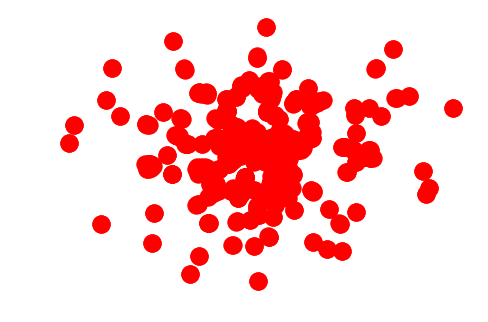

In [71]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [60]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  1124  nodes.
Aligned graph have  2928  edges.


In [61]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  1171  nodes.
Target graph have  4045  edges.


In [62]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  346553
Total Weight in Target:  422185


In [63]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  107
number of different connected components in Target graph:  104


In [64]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'ce292', 'ce17884', 'ce1630', 'ce3612', 'mm343', 'ce3403', 'ce8736', 'ce4264', 'ce846', 'ce2825', 'mm4895', 'ce3894', 'ce6329', 'mm11354', 'ce869', 'ce11741', 'ce15009', 'mm6497', 'mm4686', 'ce2820', 'mm3970', 'ce1695', 'mm377', 'ce5393', 'ce446', 'ce1780', 'mm18741', 'ce1917', 'ce897', 'mm2317', 'mm988', 'ce370', 'mm5726', 'mm17071', 'mm166', 'ce995', 'ce30', 'ce10552', 'ce3160', 'ce3103', 'ce12338', 'mm5678', 'ce15189', 'mm11476', 'ce3511', 'mm18649', 'ce788', 'ce8', 'ce1297', 'ce2675', 'mm6519', 'ce15247', 'mm18233', 'ce3650', 'mm2300', 'mm7826', 'mm5361', 'ce6958', 'ce404', 'ce4315', 'mm231', 'ce1635', 'mm2484', 'mm1837', 'ce1489', 'ce2315', 'mm14063', 'ce2036', 'ce16002', 'mm5138', 'ce541', 'ce76', 'mm1598', 'ce1906', 'ce1904', 'ce15556', 'ce6127', 'ce6372', 'mm20845', 'ce3468', 'mm2301', 'mm3362', 'ce2020', 'mm1255', 'ce11889', 'ce16004', 'ce409', 'mm6119', 'ce1560', 'ce259', 'mm1150', 'ce327', 'mm1012', 'ce8114', 'mm3657', 'ce1126', 'mm123', 'ce1166', 'mm2554', 'ce5179', 'ce34

In [65]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [66]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

102


In [67]:
Gc = max(nx.connected_component_subgraphs(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_component_subgraphs(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  585
Largest common connected graph in Target graph:  646


### check for mistake align

In [55]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# draw graphs

In [0]:
nx.draw_networkx(G1, with_labels = True)

In [0]:
nx.draw_networkx(G2)

In [0]:
import matplotlib.pyplot as plt
nx.draw(G_target_na)
plt.show()

In [68]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("ratio EC: ",ratio_ec)

total EC:  229.82954545454547
ratio EC:  72.38566131025956


In [69]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("ratio ICS: ",ratio_ics)

total ICS:  83.55711629828548
ratio ICS:  72.38566131025958


In [70]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("ratio S3: ",ratio_s3)

total S3:  158.25508607198748
ratio S3:  50.372379610406604


# compute FC

In [1]:
import pickle
with open('mm-ce-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

In [2]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['mm2709', 'ce122'],
 ['mm14262', 'ce793'],
 ['mm2803', 'ce2018'],
 ['mm21409', 'ce2943'],
 ['mm3195', 'ce7644'],
 ['mm6126', 'ce2980'],
 ['mm6384', 'ce4373'],
 ['mm3970', 'ce799'],
 ['mm6369', 'ce5755'],
 ['mm1347', 'ce4083'],
 ['mm5831', 'ce161'],
 ['mm7258', 'ce12960'],
 ['mm755', 'ce2980'],
 ['mm8456', 'ce851'],
 ['mm115', 'ce1197'],
 ['mm4782', 'ce8736'],
 ['mm8460', 'ce4323'],
 ['mm5678', 'ce2505'],
 ['mm1305', 'ce1825'],
 ['mm7826', 'ce2061'],
 ['mm2153', 'ce545'],
 ['mm1150', 'ce684'],
 ['mm3741', 'ce1198'],
 ['mm4782', 'ce3367'],
 ['mm19073', 'ce17608'],
 ['mm14063', 'ce6958'],
 ['mm18233', 'ce15750'],
 ['mm6751', 'ce2785'],
 ['mm7088', 'ce622'],
 ['mm5138', 'ce10379'],
 ['mm17223', 'ce14445'],
 ['mm7826', 'ce3187'],
 ['mm3703', 'ce1425'],
 ['mm8257', 'ce1476'],
 ['mm8257', 'ce7715'],
 ['mm3178', 'ce7388'],
 ['mm3872', 'ce3281'],
 ['mm4740', 'ce5271'],
 ['mm1347', 'ce83'],
 ['mm1092', 'ce3671'],
 ['mm3821', 'ce3367'],
 ['mm5092', 'ce3765'],
 ['mm6564', 'ce83'],
 ['mm8242', 'c

# load ontology and create DAG graph

In [3]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

,0
0,GO:0046431 GO:0019599\n
1,GO:0046430 GO:0019595\n
2,GO:0046432 GO:0019361\n
3,GO:0034198 GO:0060733\n
4,GO:0046343 GO:0019872\n
5,GO:0034193 GO:0034195\n
6,GO:0034192 GO:0034194\n
7,GO:0034190 GO:0034191\n
8,GO:0046437 GO:0030632 GO:0070179\n
9,GO:0046340 GO:0046342\n


In [4]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [5]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0042754', '0030696', '0030267', '0002518', '0060927', '0046005', '0075010', '0071605', '0019517', '0019927', '0008016', '0070983', '0047525', '0032851', '0071674', '0046832', '0050394', '0019498', '0070778', '0008935', '0008078', '0002213', '0000768', '0048550', '0047954', '0000126', '0043846', '0043624', '0048300', '0030906', '0030059', '0048070', '0004320', '0032806', '0048541', '0046818', '0060692', '0072295', '0046182', '0015039', '0034009', '0018595', '0019083', '0050754', '0051724', '0016945', '0005313', '0072047', '0034871', '0017102', '0002839', '0050810', '0010744', '0001639', '0019102', '0045295', '0021796', '0004380', '0030281', '0007042', '0016525', '0051035', '0015047', '0017107', '0050788', '0075003', '0032856', '0033544', '0047556', '0051468', '0018658', '0015538', '0019523', '0042162', '0010378', '0034119', '0002080', '0042612', '0016768', '0043220', '0031790', '0006354', '0006519', '0060117', '0050374', '0034681', '0045282', '0070255', '0060068', '0030473', '0033446'

In [6]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [7]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [8]:
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('ce' in tree[i][j] or 'mm' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

2943 5886
2943


In [9]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 0.5824849170437405
